# AST 7939 Homework Assignment #2 (10 pts)

Savannah Gramze

## All work is due Wednesday February 22 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import tree
from sklearn.tree import export_graphviz, DecisionTreeClassifier, plot_tree
from sklearn.svm import LinearSVC, SVC
from sklearn import datasets
from sklearn.pipeline import Pipeline
from astropy import units as u
from astropy import constants as const
from sklearn.model_selection import train_test_split
import random as rand

## 1. Computational complexity (2 pts)

We learned that different machine learning algorithms have different computational costs. Let's check this out using the two moons dataset (see the cell below for an example). 

(a) While varying the number of data points in the training/test dataset from 100, 1000, 10000, to 100000, measure the time it takes for kNN, DT, and SVM to create a model (i.e., fit) and make predictions. For simplicity, instead of optimizing hyperparameters, use n_neighbors=10 for kNN, max_depth=4 for DT, and kernel="rbf", C=1, gamma=1 for SVM. (1 pt)

In [2]:
from sklearn import datasets

# This is the size of the data.
n = 100

# This creates a training dataset.
X_train, y_train = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)

# This creates a test dataset for prediction. 
X_pred, y_pred = datasets.make_moons(n_samples=n, noise=0.3, random_state=1)

In [3]:
np.zeros((4, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [4]:
# time how long it takes using python

set_size = [100, 1000, 10000, 100000]
running_time_model = np.zeros((4, 3))
running_time_pred = np.zeros((4, 3))
i = 0

for n in set_size:
    # Make training dataset and test dataset for prediction
    X_train, y_train = datasets.make_moons(n_samples=n, noise=0.3, random_state=0)
    X_pred, y_pred = datasets.make_moons(n_samples=n, noise=0.3, random_state=1)
    # Scale the datasets for models that require scaling
    X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
    X_pred_scaled = StandardScaler().fit(X_train).transform(X_pred)
    # This is how big the dataset is
    print('Dataset Size:', n)
    
    ## Code for kNN
    print('kNN')
    tstart = time.time() # Start timer
    model = neighbors.KNeighborsClassifier(n_neighbors=10) # Make kNN model with n_neighbors = 10
    model.fit(X_train_scaled, y_train) # fit the model with the scaled training dataset
    running_time_model[i, 0] = time.time()-tstart
    print("Elapsed Time for Model: {:.3f}".format(running_time_model[i, 0]) + " seconds") # End timer and print elapsed time
    
    tstart = time.time() # Start timer
    model.predict(X_pred_scaled) # predict the outcome using the fitted model
    #print('Training Accuracy:', model.score(X_train_scaled, y_train))
    #print('Testing Accuracy:', model.score(X_pred_scaled, y_pred))
    running_time_pred[i, 0] = time.time()-tstart
    print("Elapsed Time for Prediction: {:.3f}".format(running_time_pred[i, 0]) + " seconds") # End timer and print elapsed time

    ## Code for Decision Tree
    print('\nDecision Tree')
    tstart = time.time() # Start timer
    model = DecisionTreeClassifier(max_depth=4) # Make Decision Tree model with max_depth = 4
    model.fit(X_train, y_train) # fit the model, DT doesn't need scaled dataset
    running_time_model[i, 1] = time.time()-tstart
    print("Elapsed Time for Model: {:.3f}".format(time.time()-tstart) + " seconds") # End timer and print elapsed time
    
    tstart = time.time() # Start timer
    model.predict(X_pred) # predict the outcome using the fitted model
    #print('Training Accuracy:', model.score(X_train_scaled, y_train))
    #print('Testing Accuracy:', model.score(X_pred_scaled, y_pred))
    running_time_pred[i, 1] = time.time()-tstart
    print("Elapsed Time for Prediction: {:.3f}".format(running_time_pred[i, 1]) + " seconds") # End timer and print elapsed time
    
    ## Code for SVM
    print('\nSupport Vector Machine')
    tstart = time.time() # Start timer
    model = Pipeline([ 
                        ('sc', StandardScaler()), # SVM does the scaling as part of the pipeine
                        ('svm', SVC(C=1, kernel="rbf", gamma=1, random_state=0)) # kernel="rbf", C=1, gamma=1 for SVM
                    ])
    model.fit(X_train, y_train)
    running_time_model[i, 2] = time.time()-tstart
    print("Elapsed Time for Model: {:.3f}".format(time.time()-tstart) + " seconds") # End timer and print elapsed time
    
    tstart = time.time() # Start timer
    model.predict(X_pred) # predict the outcome using the fitted model
    #print('Training Accuracy:', model.score(X_train_scaled, y_train))
    #print('Testing Accuracy:', model.score(X_pred_scaled, y_pred))
    running_time_pred[i, 2] = time.time()-tstart
    print("Elapsed Time for Prediction: {:.3f}".format(running_time_pred[i, 2]) + " seconds") # End timer and print elapsed time
    print('======================================================')
    i+=1

Dataset Size: 100
kNN
Elapsed Time for Model: 0.002 seconds
Elapsed Time for Prediction: 0.013 seconds

Decision Tree
Elapsed Time for Model: 0.003 seconds
Elapsed Time for Prediction: 0.000 seconds

Support Vector Machine
Elapsed Time for Model: 0.004 seconds
Elapsed Time for Prediction: 0.000 seconds
Dataset Size: 1000
kNN
Elapsed Time for Model: 0.000 seconds
Elapsed Time for Prediction: 0.018 seconds

Decision Tree
Elapsed Time for Model: 0.001 seconds
Elapsed Time for Prediction: 0.000 seconds

Support Vector Machine
Elapsed Time for Model: 0.010 seconds
Elapsed Time for Prediction: 0.009 seconds
Dataset Size: 10000
kNN
Elapsed Time for Model: 0.003 seconds
Elapsed Time for Prediction: 0.179 seconds

Decision Tree
Elapsed Time for Model: 0.010 seconds
Elapsed Time for Prediction: 0.001 seconds

Support Vector Machine
Elapsed Time for Model: 0.841 seconds
Elapsed Time for Prediction: 0.760 seconds
Dataset Size: 100000
kNN
Elapsed Time for Model: 0.029 seconds
Elapsed Time for Predi

(b) Make a plot showing the running time vs. size of dataset for the three algorightms and for training/prediction -- you will have six curves in the end. Make sure your figure is readable. Discuss what you find from the plot. Using a logarithmic scale for both x and y axes will be helpful to interpret the result. (1 pt)

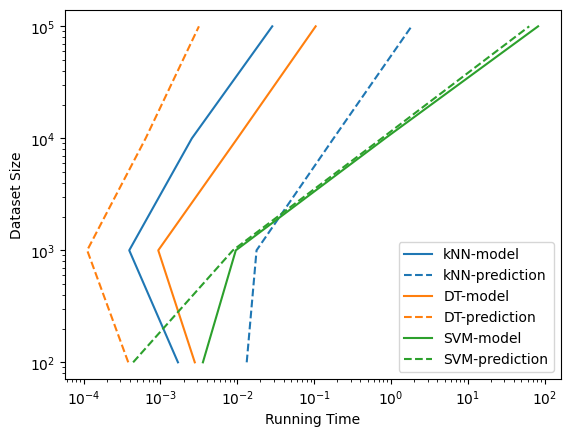

In [5]:
# Will have 6 curves measured, make a plot of time vs number of datasets. For the three models kNN, DT and SVM. 
# Why is what you see happening in the diagram? 

plt.plot(running_time_model[:,0], set_size, color='tab:blue', label='kNN-model')
plt.plot(running_time_pred[:,0], set_size, color='tab:blue', linestyle='--', label='kNN-prediction')

plt.plot(running_time_model[:,1], set_size, color='tab:orange', label='DT-model')
plt.plot(running_time_pred[:,1], set_size, color='tab:orange', linestyle='--', label='DT-prediction')

plt.plot(running_time_model[:,2], set_size, color='tab:green', label='SVM-model')
plt.plot(running_time_pred[:,2], set_size, color='tab:green', linestyle='--', label='SVM-prediction')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Running Time')
plt.ylabel('Dataset Size')
plt.legend()

Why is this happening????

As the datasets get larger, it takes more time to create the models and make predictions based on them. Each type of model has a different relationship between the time it takes to build a model or make a prediction and how big the dataset is. For kNN, the model is made faster than the predictions as each test data point needs to be checked when making predictions. For DT, the tree has already been made, so the prediction happens quicker than first making the model. For SVM, the times for making the model and making predicitons are relatively close, but the running time for making predictions is lower than for making a model.



## 2. Support Vector Machine classifier (8 pts)

We will build Support Vector Machines to determine the hyperplane separating Super-Earths and Sub-Neptunes, the so-called radius valley in planet radius vs. orbital period plots (see Fulton et al. 2017; https://ui.adsabs.harvard.edu/abs/2017AJ....154..109F/abstract). To determine accurate planet parameters from transit surveys, accurate stellar parameters are required, because the transit depth only constrains $R_p/R_*$, where $R_p$ and $R_*$ are the planetary and stellar radius. In Van Eylen et al. (2018; https://ui.adsabs.harvard.edu/abs/2018MNRAS.479.4786V/abstract), authors used a sample of exoplanet host stars with parameters homogeneously measured from asteroseismology, which can provide highly precise masses and radii for a sample of bright stars, and determined that the radius valley can be describe by ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.09^{+0.02}_{-0.04}$ and $a=0.37^{+0.04}_{-0.02}$.

In this homework problem, we will reproduce the SVM models of Van Eylen et al. (2018).

(a) First things first: let's collect the data presented in Table 1 of Van Eylen et al. (2018). One way to do this is to download the source file from the arXiv and read in the table (and do some cleaning). This can be tedious, but remember that making a ML model will always start with data acquisition and cleaning! When you submit your homework, upload the data file you compile so that I can reproduce your results. (1 pt)

In [6]:
# No planets are in the radius gap, why? Atmospheres being stripped or rocky planets? 
# observational effect of planet radius vs orbital period 

## Open datafile (remember to turn in)
f = open('vaneylen_data.txt', 'r')
data = f.read()
f.close()

## Split into rows
rows = data.strip().split('\\\\')[:-1]
size = len(rows)-1

## Take first row = names
names = [r.strip() for r in rows[0].split('&')]

## Initialize each column
planet_name = np.empty(size, dtype=object)
planet_radius = np.zeros(size)
planet_radius_err = np.zeros(size)
period = np.zeros(size)
period_err = np.zeros(size)
star_mass = np.zeros(size)
star_radius = np.zeros(size)

ii = 0
## Set each value of the columns for each row
for line in rows[1:]:
    cols = line.split('&')

    # Save system name
    planet_name[ii] = cols[0].strip()

    # Save the planet radius and radius error
    planet_radius[ii] = float(cols[1].strip().split('\pm')[0].strip()[1:])
    planet_radius_err[ii] = float(cols[1].strip().split('\pm')[1].strip()[:-1])

    # Save the period of the planet and its error
    period[ii] = float(cols[2].strip()[1:].strip().split()[0])
    try:
        period_err[ii] = float(cols[2].strip()[1:].strip().split()[0]+cols[2].strip()[1:].strip().split()[1].split('(')[1].split(')')[0])-period[ii]
    except: # To deal with (n/a)
        period_err[ii] = np.nan

    # Save the star mass
    star_mass[ii] = float(cols[3].strip().split('_')[0].split('^')[0][1:].strip())

    # Save the star radius
    star_radius[ii] = float(cols[4].strip().split('_')[0].split('^')[0][1:].strip())

    ii += 1
print(names)

['Planet', 'R$_\\mathrm{p}$ [R$_\\oplus$]', 'Period [d]', 'M$_\\star$ [M$_\\odot$]', 'R$_\\star$ [R$_\\odot$]']


(b) Let's make a plot showing planet radius vs. orbital period, similar to Figure 2 of Van Eylen et al. (2018) but without additional data from Fulton et al. (2017). Similar to Figure 2 of Van Eylen et al. (2018), make two panels, one showing the entire data points and the other showing 1-100 days & 1-4 Earth radii to more clearly identify the radius valley. (1 pt)

In [7]:
plt.rcParams.update({'font.size': 16})

(0.4940838888022993, 500)

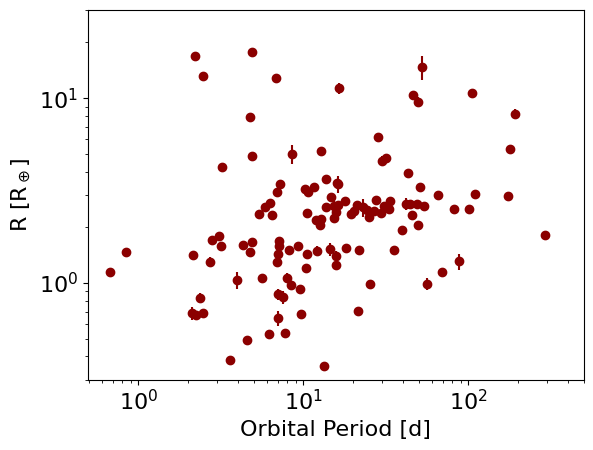

In [8]:
# Recreate Figure 2, just need to plot the red dots, not the other data
# Then have a zoom-in figure of the radius valley

# Just like panel 1 of Figure 2
plt.scatter(period, planet_radius, color='darkred')
plt.errorbar(period, planet_radius, yerr=planet_radius_err, ls='none', color='darkred')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
plt.ylim(0.3, 30)
plt.xlim(right=500)



(1, 100)

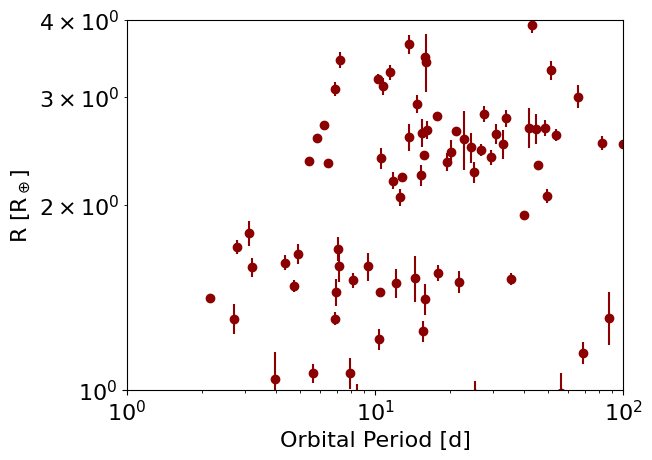

In [9]:
# Just like panel 2 of Figure 2, zoom-in of the radius valley
plt.scatter(period, planet_radius, color='darkred')
plt.errorbar(period, planet_radius, yerr=planet_radius_err, ls='none', color='darkred')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
plt.ylim(1, 4)
plt.xlim(1, 100)

(c) We would like to fit the radius valley using the SVM. However, in order to use the SVM, we need a labelled data in the first place. Luckily, we have a well separated dataset. In Van Eylen et al. (2018), they took a few different approaches to fit the radius valley. Here, let's use one of the fits from bootstrapping, that is, if a planet's radius and orbital periods satisfy ${\rm log}_{10} R_p > m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, then we will label them as sub-Neptunes. If ${\rm log}_{10} R_p \leq m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$, we will label them as super-Earth. Using this criterion, make an array that contains the label (e.g., 0 if sub-Neptune, 1 if super-Earth).

Then, repeat #2b and make similar plots, but this time make the data points color-coded by their labels. Also, add a line showing ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$, where $m=-0.10$ and $a=0.38$. Your plot should look similar to Figure 5 of Van Eylen et al. (2018), except that you will have a single line dividing super-Earths and sub-Neptunes instead of multiple lines representing 20 different fits. (1 pt)

In [10]:
# everything above line is sub-neptune, everything below is super earth
# make that classification an array
# color code the points by their classification and overplot the line, recreate Fig 5

def classify(R_planet, period):
    m = -0.10
    a = 0.38
    satisfy = 10**(m * np.log10(period) + a)
    if R_planet > satisfy:
        #print('Sub-Neptune')
        return 0.0 # Sub-Neptune
    elif R_planet <= satisfy:
        #print('Super-Earth')
        return 1.0 # Super-Earth

label = np.zeros(size)
for ii in range(size):
    label[ii] = classify(planet_radius[ii], period[ii])


(0.5, 500)

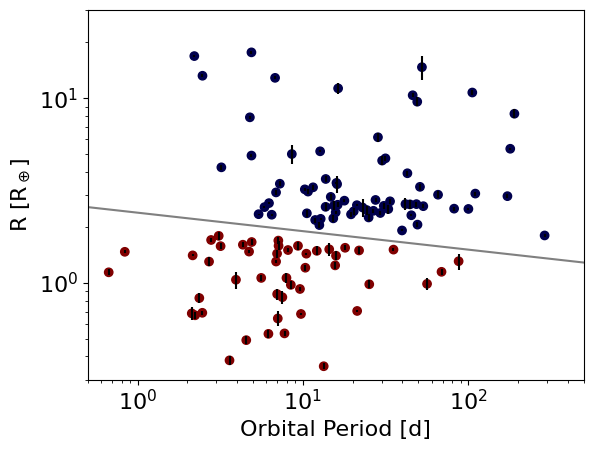

In [11]:
#for ii in range(size):
#    if label[ii] < 0.5:
#        plt.scatter(period[ii], planet_radius[ii], color='darkblue')
#        plt.errorbar(period[ii], planet_radius[ii], yerr=planet_radius_err[ii], ls='none', color='darkblue')
#    elif label[ii] == 1.0:
#        plt.scatter(period[ii], planet_radius[ii], color='darkred')
#        plt.errorbar(period[ii], planet_radius[ii], yerr=planet_radius_err[ii], ls='none', color='darkred')

plt.errorbar(period, planet_radius, yerr=planet_radius_err, ls='none', c='black')
plt.scatter(period, planet_radius, c=label, cmap='seismic')

days = np.linspace(0.01, 500, num=30)
plt.plot(days, 10**(-0.1*np.log10(days)+0.38), color='grey')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
plt.ylim(0.3, 30)
plt.xlim(left=0.5, right=500)

(1, 100)

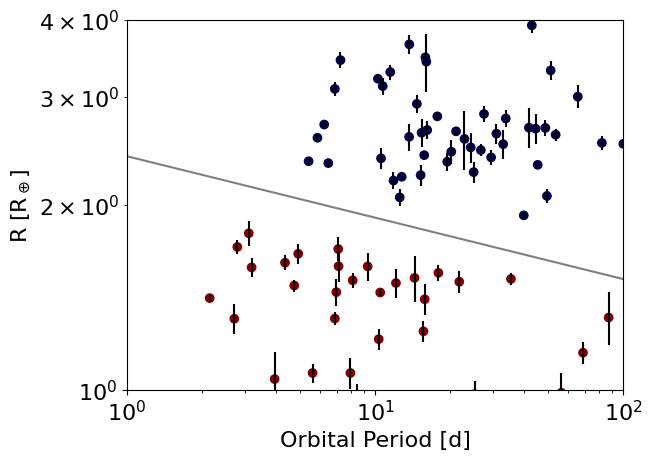

In [12]:
# Just like panel 2 of Figure 2, zoom-in of the radius valley
plt.scatter(period, planet_radius, c=label, cmap='seismic')
plt.errorbar(period, planet_radius, yerr=planet_radius_err, ls='none', color='black')

days = np.linspace(0.01, 500, num=30)
plt.plot(days, 10**(-0.1*np.log10(days)+0.38), color='grey')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
plt.ylim(1, 4)
plt.xlim(1, 100)

(d) Now that we have a labelled dataset, we are ready to build SVM models. Using orbital period and planet radius (both in log scale) as two features, make a few linear SVM models varying the panelty parameter C from 0.01, 0.1, 1, 10, 100, to 1000. Then, make six figures showing the data, hyperplane, and support vectors. Don't forget that SVMs need feature scaling. (2 pt)

In [13]:
# make SVM models similar to the ones in class with the hyperplane and support vectors 
# 6 models in total 
# draw hyperplane and mark support vectors
# remember feature scaling 

scaler = StandardScaler()
penalty_C = np.array([0.01, 0.1, 1., 10., 100., 1000.])

log_radius = np.log10(planet_radius)
log_period = np.log10(period)

X = np.array([log_period, log_radius]).T
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)


In [14]:
C = 0.1
svm_clf = LinearSVC(C=C) # C varies according to above array
scaled_svm = Pipeline([  # For feature scaling 
        ("scaler", scaler),
        ("linear_svc", svm_clf), 
    ])
scaled_svm.fit(X_train, y_train)
print(scaled_svm.score(X_test, y_test))

0.9666666666666667


In [15]:
# For plotting, unscale the params
b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
# Dividing by the scale to get back to the original space
w = svm_clf.coef_[0] / scaler.scale_ 

#svm_clf.intercept_ = np.array([b])
#svm_clf.coef_ = np.array([w])

t = y * 2 - 1
support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
svm_clf.support_vectors_ = X[support_vectors_idx]
print(b, w)

[1.6358516] [-0.64573539 -3.44869547]


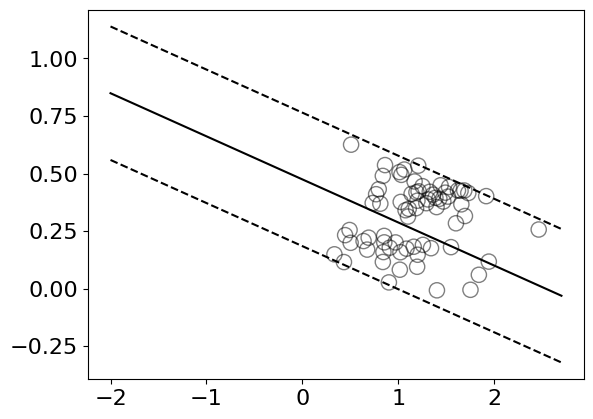

In [16]:
decision_boundary = -w[0]/w[1]*np.log10(days)-b/w[1]
plt.plot(np.log10(days), decision_boundary, color='k')
margin = 1/w[1]
gutter_up = decision_boundary + margin
gutter_down = decision_boundary - margin
plt.plot(np.log10(days), gutter_up, color='k', linestyle='--')
plt.plot(np.log10(days), gutter_down, color='k', linestyle='--')
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)

Text(0.5, 1.0, 'C = 0.1')

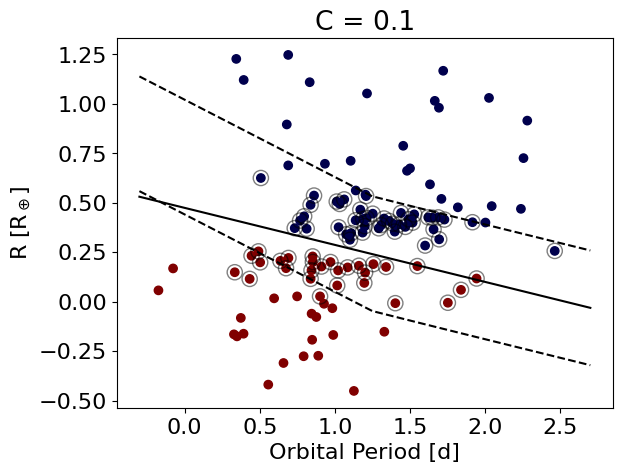

In [17]:
plt.scatter(log_period, log_radius, c=label, cmap='seismic')
#plt.errorbar(log_period, log_radius, yerr=planet_radius_err, ls='none', color='black')

days = np.linspace(0.5, 500, num=30)
#plt.plot(days, 10**(-0.1*np.log10(days)+0.38), color='grey')
plt.plot(np.log10(days), -w[0]/w[1]*np.log10(days)-b/w[1], color='k')
plt.plot(np.log10(days), gutter_up, color='k', linestyle='--')
plt.plot(np.log10(days), gutter_down, color='k', linestyle='--')
svs = svm_clf.support_vectors_
plt.scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)

plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
plt.title('C = 0.1')

C = 0.01 m =  -0.34265840183729157 a =  [0.6052806]
C = 0.1 m =  -0.1611161201886514 a =  [0.4315569]
C = 1.0 m =  -0.0877605076380342 a =  [0.37256193]
C = 10.0 m =  -0.06828655321522052 a =  [0.34858478]
C = 100.0 m =  -0.06676763520134889 a =  [0.349976]
C = 1000.0 m =  -0.06971297374648323 a =  [0.35192258]


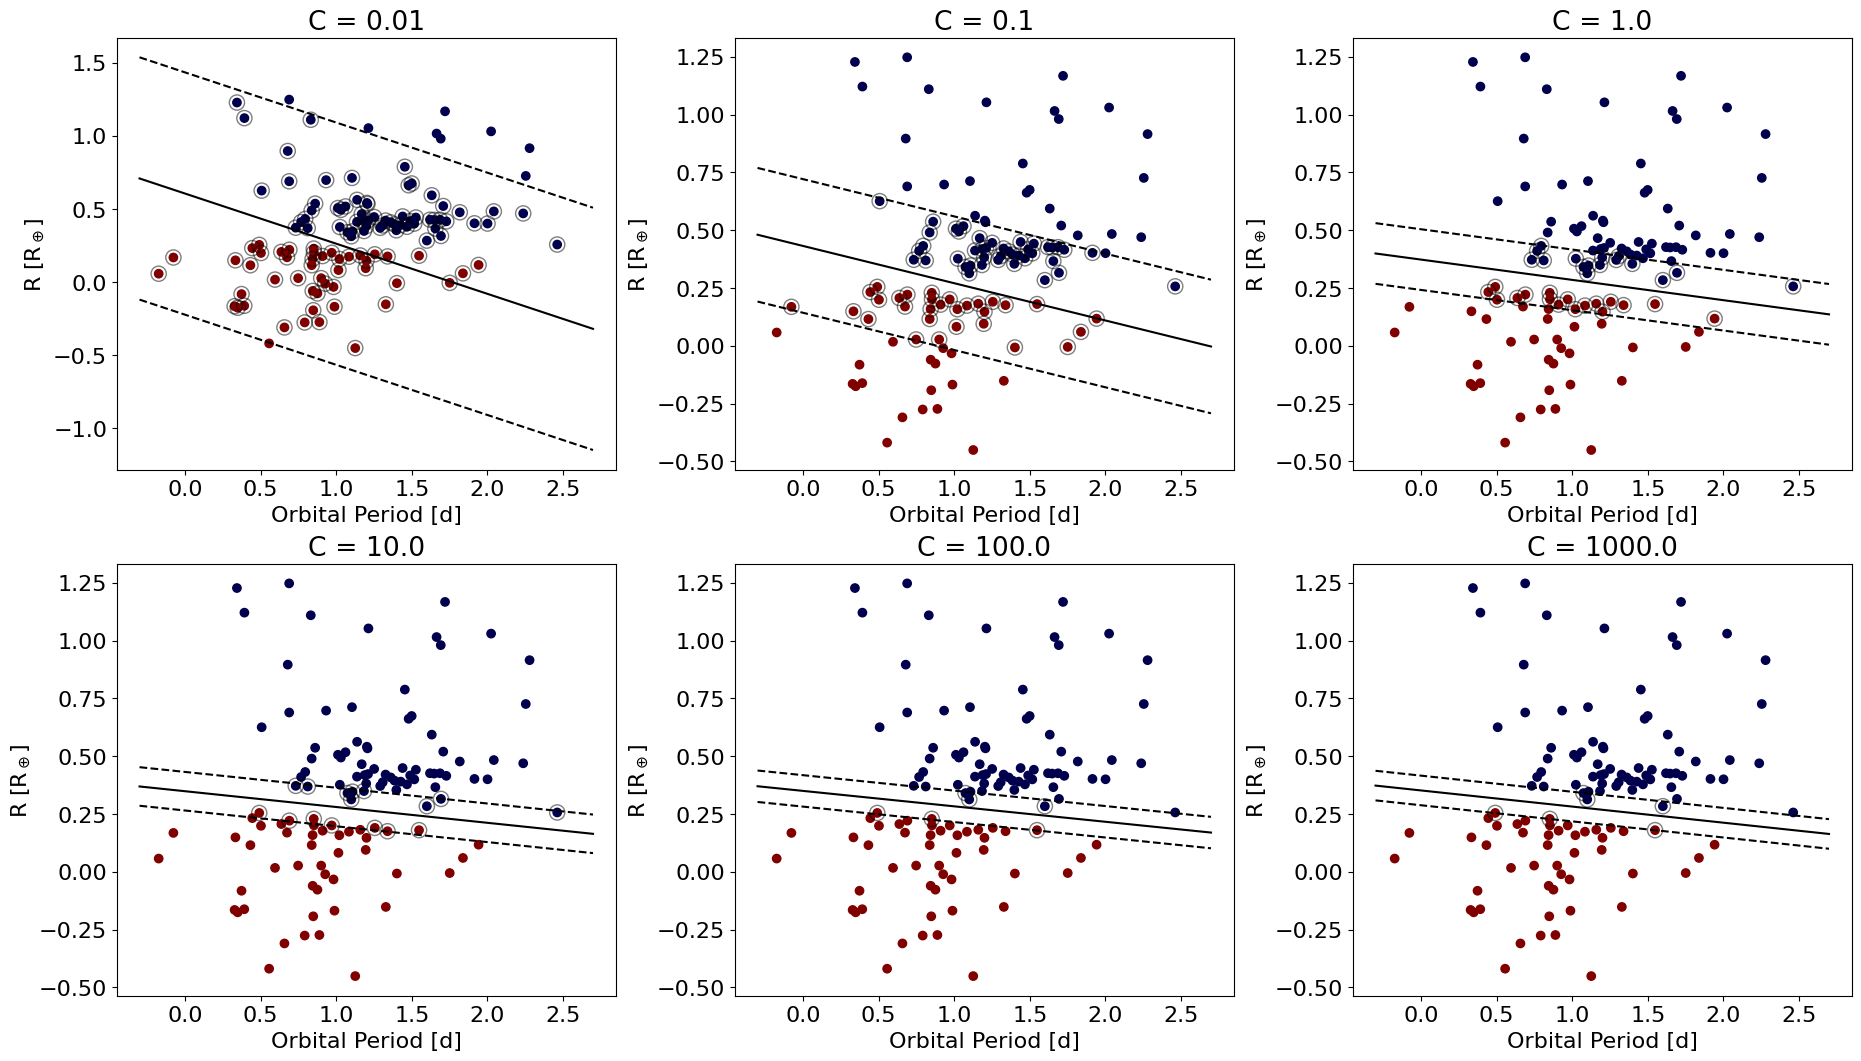

In [18]:
fig, axes = plt.subplots(2, 3)
fig.set_constrained_layout(True)
fig.set_size_inches(18.5, 10.5)
axs = axes.flatten()

X = np.array([log_period, log_radius]).T
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

ii = 0
days = np.linspace(0.5, 500, num=30)

for C in penalty_C:
    svm_clf = LinearSVC(C=C) # C varies according to above array
    scaled_svm = Pipeline([  # For feature scaling 
            ("scaler", scaler),
            ("linear_svc", svm_clf), 
        ])
    scaled_svm.fit(X_train, y_train) # Fit the model to the data

    # For plotting, unscale the params
    b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
    # Dividing by the scale to get back to the original space
    w = svm_clf.coef_[0] / scaler.scale_ 
    
    # Find the support vectors
    t = y * 2 - 1
    support_vectors_idx = (t * (X.dot(w) + b) < 1).ravel()
    svm_clf.support_vectors_ = X[support_vectors_idx]
    
    # Calculate decision boundary
    decision_boundary = -w[0]/w[1]*np.log10(days)-b/w[1]
    # Calculate support vectors
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    axs[ii].scatter(log_period, log_radius, c=label, cmap='seismic')
    axs[ii].plot(np.log10(days), -w[0]/w[1]*np.log10(days)-b/w[1], color='k')
    axs[ii].plot(np.log10(days), gutter_up, color='k', linestyle='--')
    axs[ii].plot(np.log10(days), gutter_down, color='k', linestyle='--')
    svs = svm_clf.support_vectors_
    axs[ii].scatter(svs[:, 0], svs[:, 1], s=120, edgecolors='black', facecolors='none', alpha=0.5)

    axs[ii].set_xlabel('Orbital Period [d]')
    axs[ii].set_ylabel('R [R$_\\oplus$]')
    axs[ii].set_title('C = ' + str(C))
    
    print('C = ' + str(C), 'm = ', -w[0]/w[1], 'a = ', -b/w[1])
    
    ii += 1
    
fig.savefig('linearSVM.png', dpi=100)

(e) Which penalty parameter $C$ do you think best seperates super-Earths and sub-Neptunes? And why? Write down an equation for the hyperplane in the form of ${\rm log}_{10} R_p = m{\rm log}_{10} P + a$. (1 pt)

I think that a penalty parameter of 10 best separates super-Earths and sub-Neptunes. This penalty parameter is best as it maximizes the margin of separation and toleration of misclassification. Since the data are well separated, only the points closest to the decision boundary should be used to determine its shape. C = 10 is a good compromise between the extremes of using all of the data to determine the support vectors for a low C, and very few data points at high C.

${\rm log}_{10} R_p = -0.068{\rm log}_{10} P + 0.348$

In [19]:
# which C fits best? Read the paper to see context
# find the slope and intersect using SVM


(f) Uncertainties on the slope $m$ and offset $a$ can be determined using bootstrapped samples ([random sampling with replacement](https://en.wikipedia.org/wiki/Bootstrapping_(statistics) )). Following Van Eylen et al. (2018), generate 1000 bootstrapped samples each of which has the same size as the original dataset. For each bootstrapped, compute the slope $m$ and offset $a$ of the hyperplane using the best $C$ you determined from #2e. Compute the mean and standard deviation of $m$ and $a$. What is your final hyperplane, and how does that compare with the hyperplane Van Eylen et al. (2018) determined? (2 pt)  

Mean m: -0.08552102427897212 Mean a: 0.36363102523830926
Std m: 0.021612119225839322 Std a: 0.023278360989461344


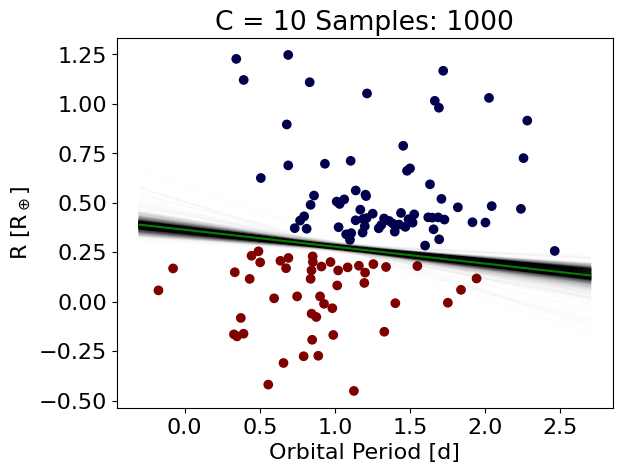

In [20]:
# use bootstrap to find uncertainty
# will generate 1000 hyperplanes 

num=1000 # generate n of bootstrapped samples, this is how many samples
randintegers = np.zeros(size*num, dtype=np.int8) 

for r in range(len(randintegers)): # fill a list with random integers, enough to fill n lists with same size as og dataset
    randintegers[r] = rand.randint(0, size-1)

samples = randintegers.reshape(num, size) # reshape list for proper use

mean_m = []
mean_a = []

plt.scatter(log_period, log_radius, c=label, cmap='seismic')

plt.xlabel('Orbital Period [d]')
plt.ylabel('R [R$_\\oplus$]')
titl = 'C = ' + str(10) + ' Samples: ' + str(num)
plt.title(titl)

for boot in samples:
    # initialize sampled dataset
    log_p = []
    log_r = []
    labs = []
    for bb in boot: # with replacement, add specific params to lists
        log_p.append(log_period[bb])
        log_r.append(log_radius[bb])
        labs.append(label[bb])
    
    X = np.array([log_p, log_r]).T # transform for use in SVM
    y = labs
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    svm_clf = LinearSVC(C=10) # C varies according to above array
    scaled_svm = Pipeline([  # For feature scaling 
            ("scaler", scaler),
            ("linear_svc", svm_clf), 
        ])
    scaled_svm.fit(X_train, y_train) # Fit the model to the data
    
    # For plotting, unscale the params
    b = svm_clf.decision_function([-scaler.mean_ / scaler.scale_])
    # Dividing by the scale to get back to the original space
    w = svm_clf.coef_[0] / scaler.scale_ 
    
    # Calculate decision boundary
    decision_boundary = -w[0]/w[1]*np.log10(days)-b/w[1]
    # Calculate support vectors
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    plt.plot(np.log10(days), -w[0]/w[1]*np.log10(days)-b/w[1], color='k', alpha=0.01)
    #plt.plot(np.log10(days), gutter_up, color='k', linestyle='--', alpha=0.1)
    #plt.plot(np.log10(days), gutter_down, color='k', linestyle='--', alpha=0.1)
    
    #print('C = ' + str(10), 'm = ', -w[0]/w[1], 'a = ', -b/w[1])
    mean_m.append(-w[0]/w[1])
    mean_a.append(-b/w[1])

calc_m = np.mean(np.array(mean_m))
calc_a = np.mean(np.array(mean_a))
print('Mean m:', calc_m, 'Mean a:', calc_a)
print('Std m:', np.std(np.array(mean_m)), 'Std a:', np.std(np.array(mean_a)))

decision_boundary = calc_m*np.log10(days)+calc_a
plt.plot(np.log10(days), decision_boundary, color='green') # The "final" hyperplane

Bootstrapped $m = -0.08 \pm 0.02$, and bootstrapped $a = 0.36 \pm 0.02$

So the final hyperplane is:

${\rm log}_{10} R_p = -0.084{\rm log}_{10} P + 0.362$

After their bootstrapping approach, Van Eylan found $m = -0.09^{+0.02}_{-0.04}$ and $a = 0.37^{+0.04}_{-0.02}$.

Our results are within one standard deviation, making them relatively similar.

### Congratulations! With this homework, you essentially reproduced results presented in a journal paper. If you enjoyed the homework and would like to do some additional related analysis, I recommend you have a look at the following papers. Reproducing (and extending) the following papers would be a nice term project.

https://ui.adsabs.harvard.edu/abs/2021AJ....161..265D/abstract

https://ui.adsabs.harvard.edu/abs/2023MNRAS.519.4056H/abstract